Data can be found in: https://zenodo.org/records/13380286

In [1]:
import xarray as xr
import numpy as np
from pathlib import Path
from itertools import combinations, product
from matplotlib import pyplot as plt
from skimage.transform import resize
from scipy.ndimage import rotate
import dask
dask.config.set(scheduler="synchronous")

rng = np.random.default_rng(seed=42)

In [2]:
# Select files used for training
dir_cutouts = Path("/data/Projects/2024_Invasive_species/Tree_Classification/notebooks/data_agu/all_cutouts")
list_files = [
    
    "label142377591163_murumuru.zarr",
    "label244751236943_tucuma.zarr",
    "label174675723264_banana.zarr",
    "label999240878592_cacao.zarr",
    "label370414265344_fruit.zarr",
]
for file in list_files:
    data = xr.open_zarr(dir_cutouts / file)
    print(file)
    print(f"shape:{data['X'].sizes}")
    print(f"label:{np.unique(data['Y'].values)}")
    print("---")

label142377591163_murumuru.zarr
shape:Frozen({'sample': 14, 'x': 128, 'y': 128, 'channel': 3})
label:[1.42377591e+11]
---
label244751236943_tucuma.zarr
shape:Frozen({'sample': 29, 'x': 128, 'y': 128, 'channel': 3})
label:[2.44751237e+11]
---
label174675723264_banana.zarr
shape:Frozen({'sample': 104, 'x': 128, 'y': 128, 'channel': 3})
label:[174675723264]
---
label999240878592_cacao.zarr
shape:Frozen({'sample': 79, 'x': 128, 'y': 128, 'channel': 3})
label:[999240878592]
---
label370414265344_fruit.zarr
shape:Frozen({'sample': 55, 'x': 128, 'y': 128, 'channel': 3})
label:[370414265344]
---


In [ ]:
# Manually investigate and select
# f_invextigate = list_files[2]
# ds_investigate = xr.open_zarr(dir_cutouts / f_invextigate)
# print(f_invextigate)
# # ds_investigate["X"].plot.imshow(col="sample", col_wrap=5)
# ds_investigate["X"].isel(sample = range(0, 50)).plot.imshow(col="sample", col_wrap=5)

## Manually select cutouts to make training pairs


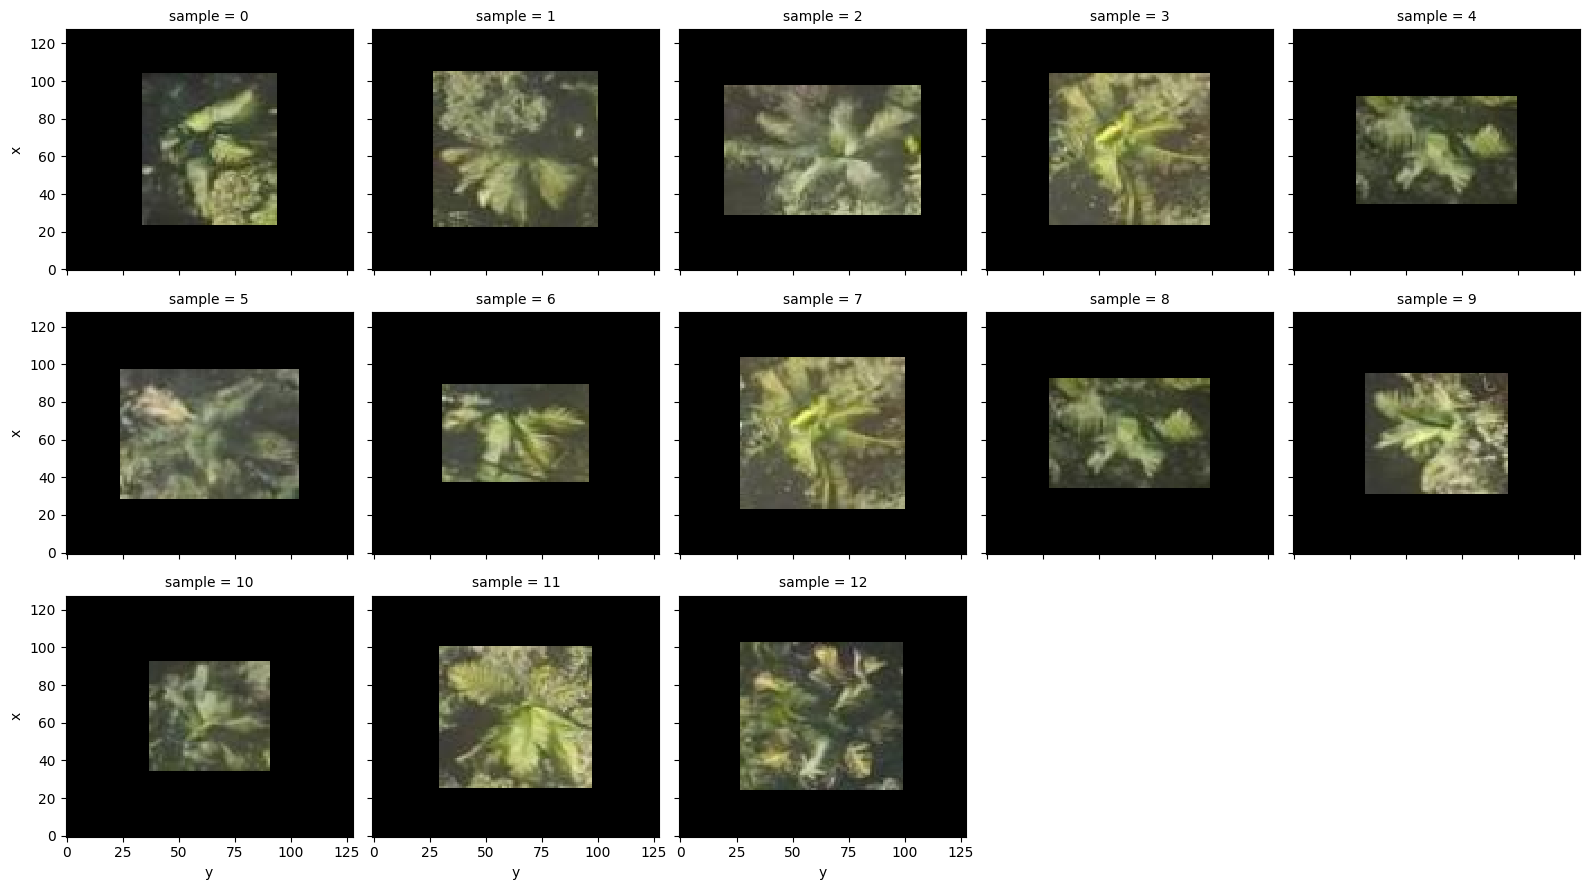

In [3]:
ds_murumuru = xr.open_zarr(dir_cutouts / "label142377591163_murumuru.zarr")
ds_murumuru = ds_murumuru.isel(sample = range(13))
ds_murumuru["X"].plot.imshow(col="sample", col_wrap=5)

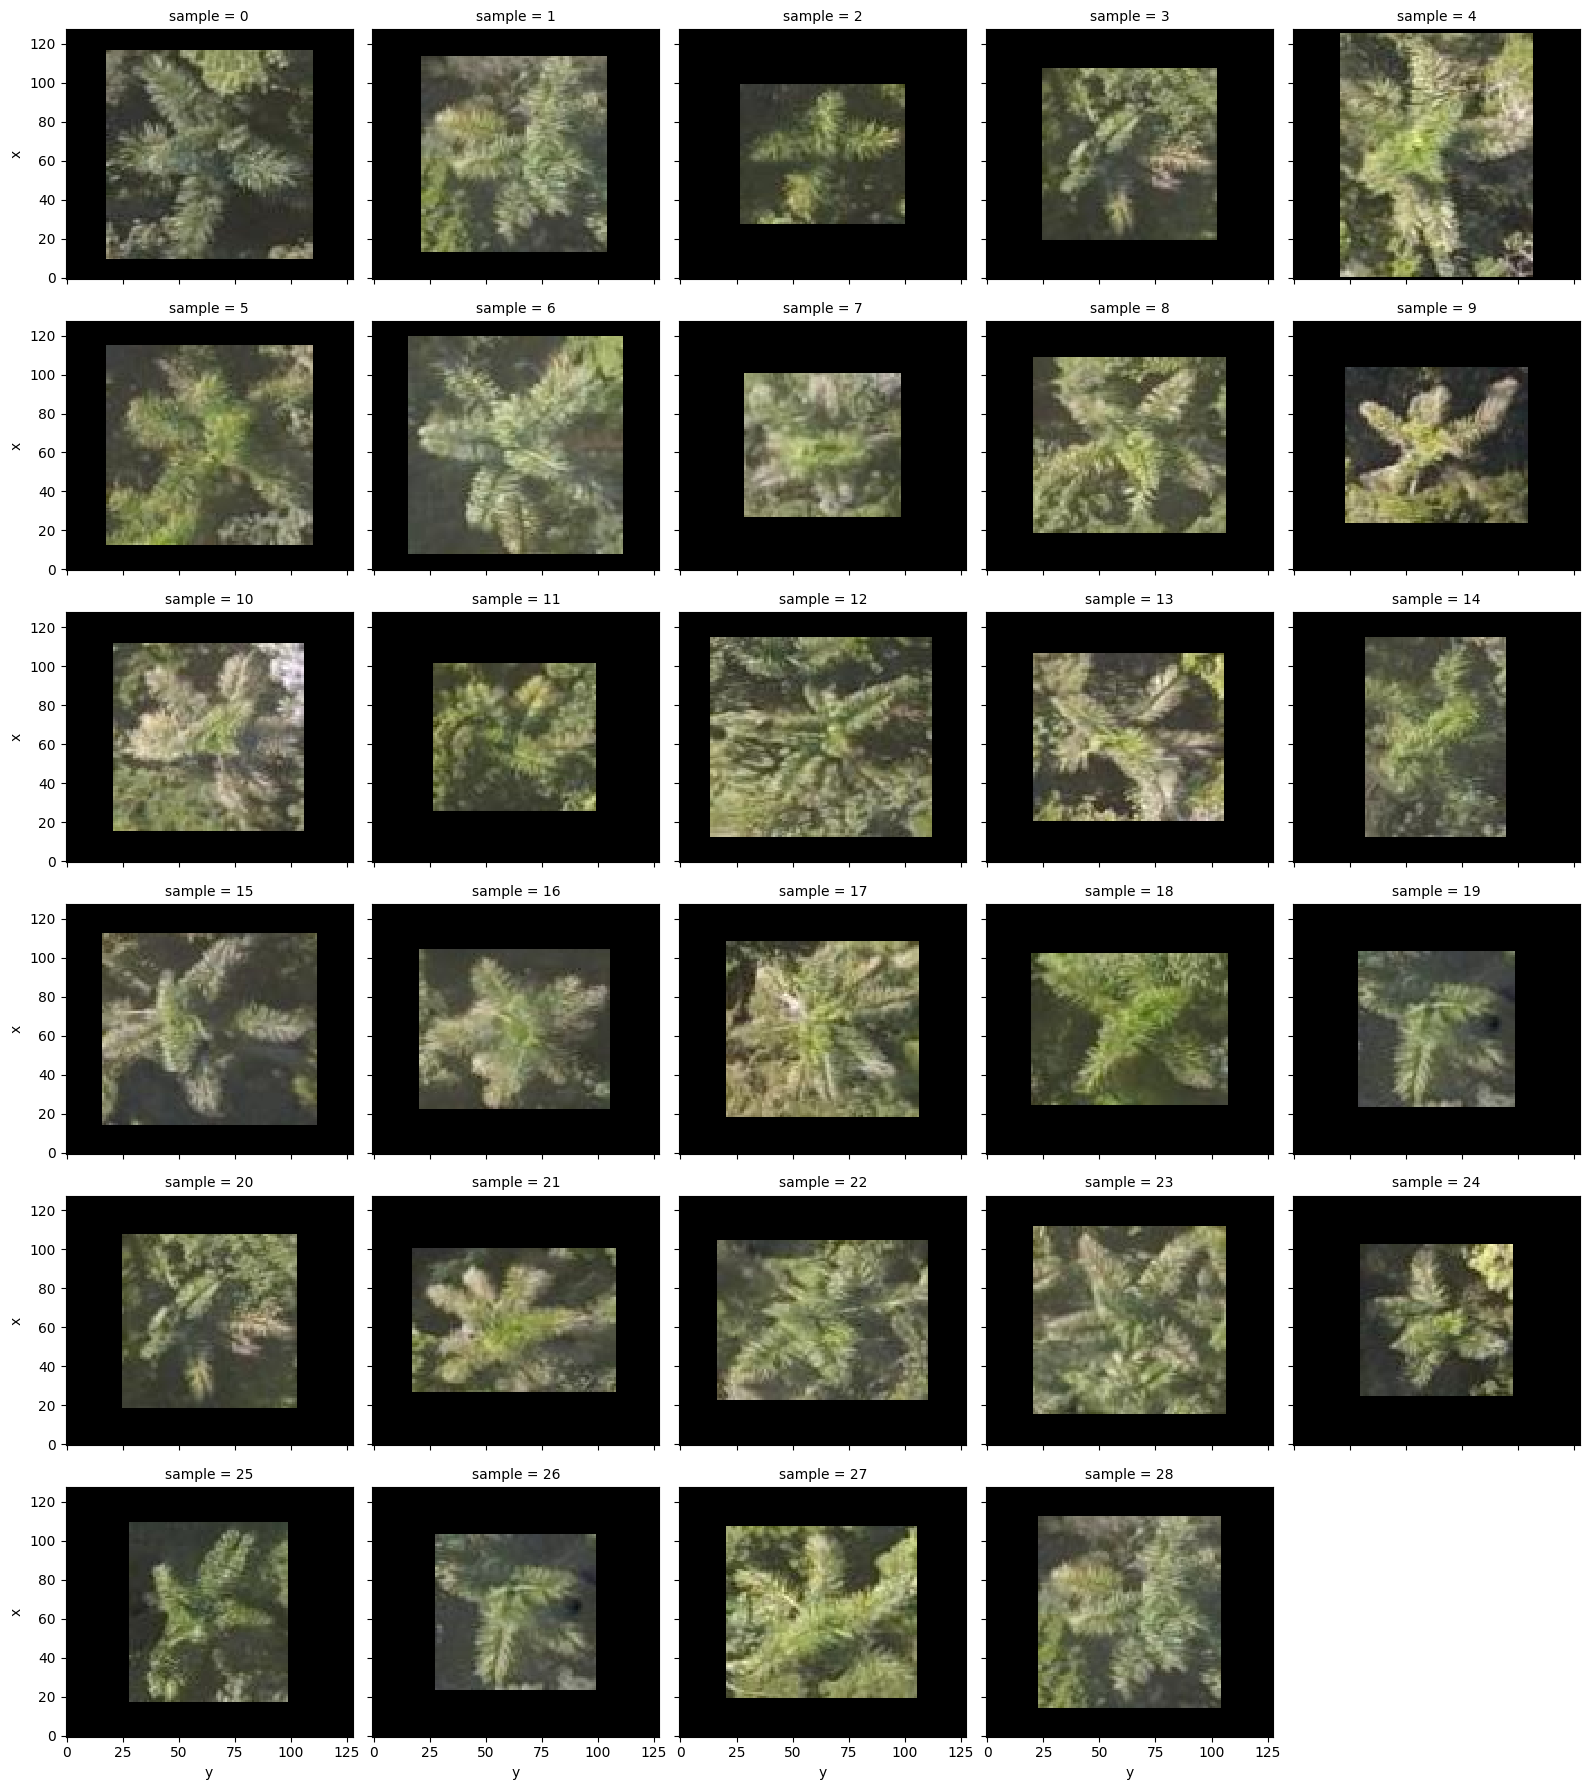

In [4]:
ds_tucuma = xr.open_zarr(dir_cutouts / "label244751236943_tucuma.zarr")
ds_tucuma["X"].plot.imshow(col="sample", col_wrap=5)

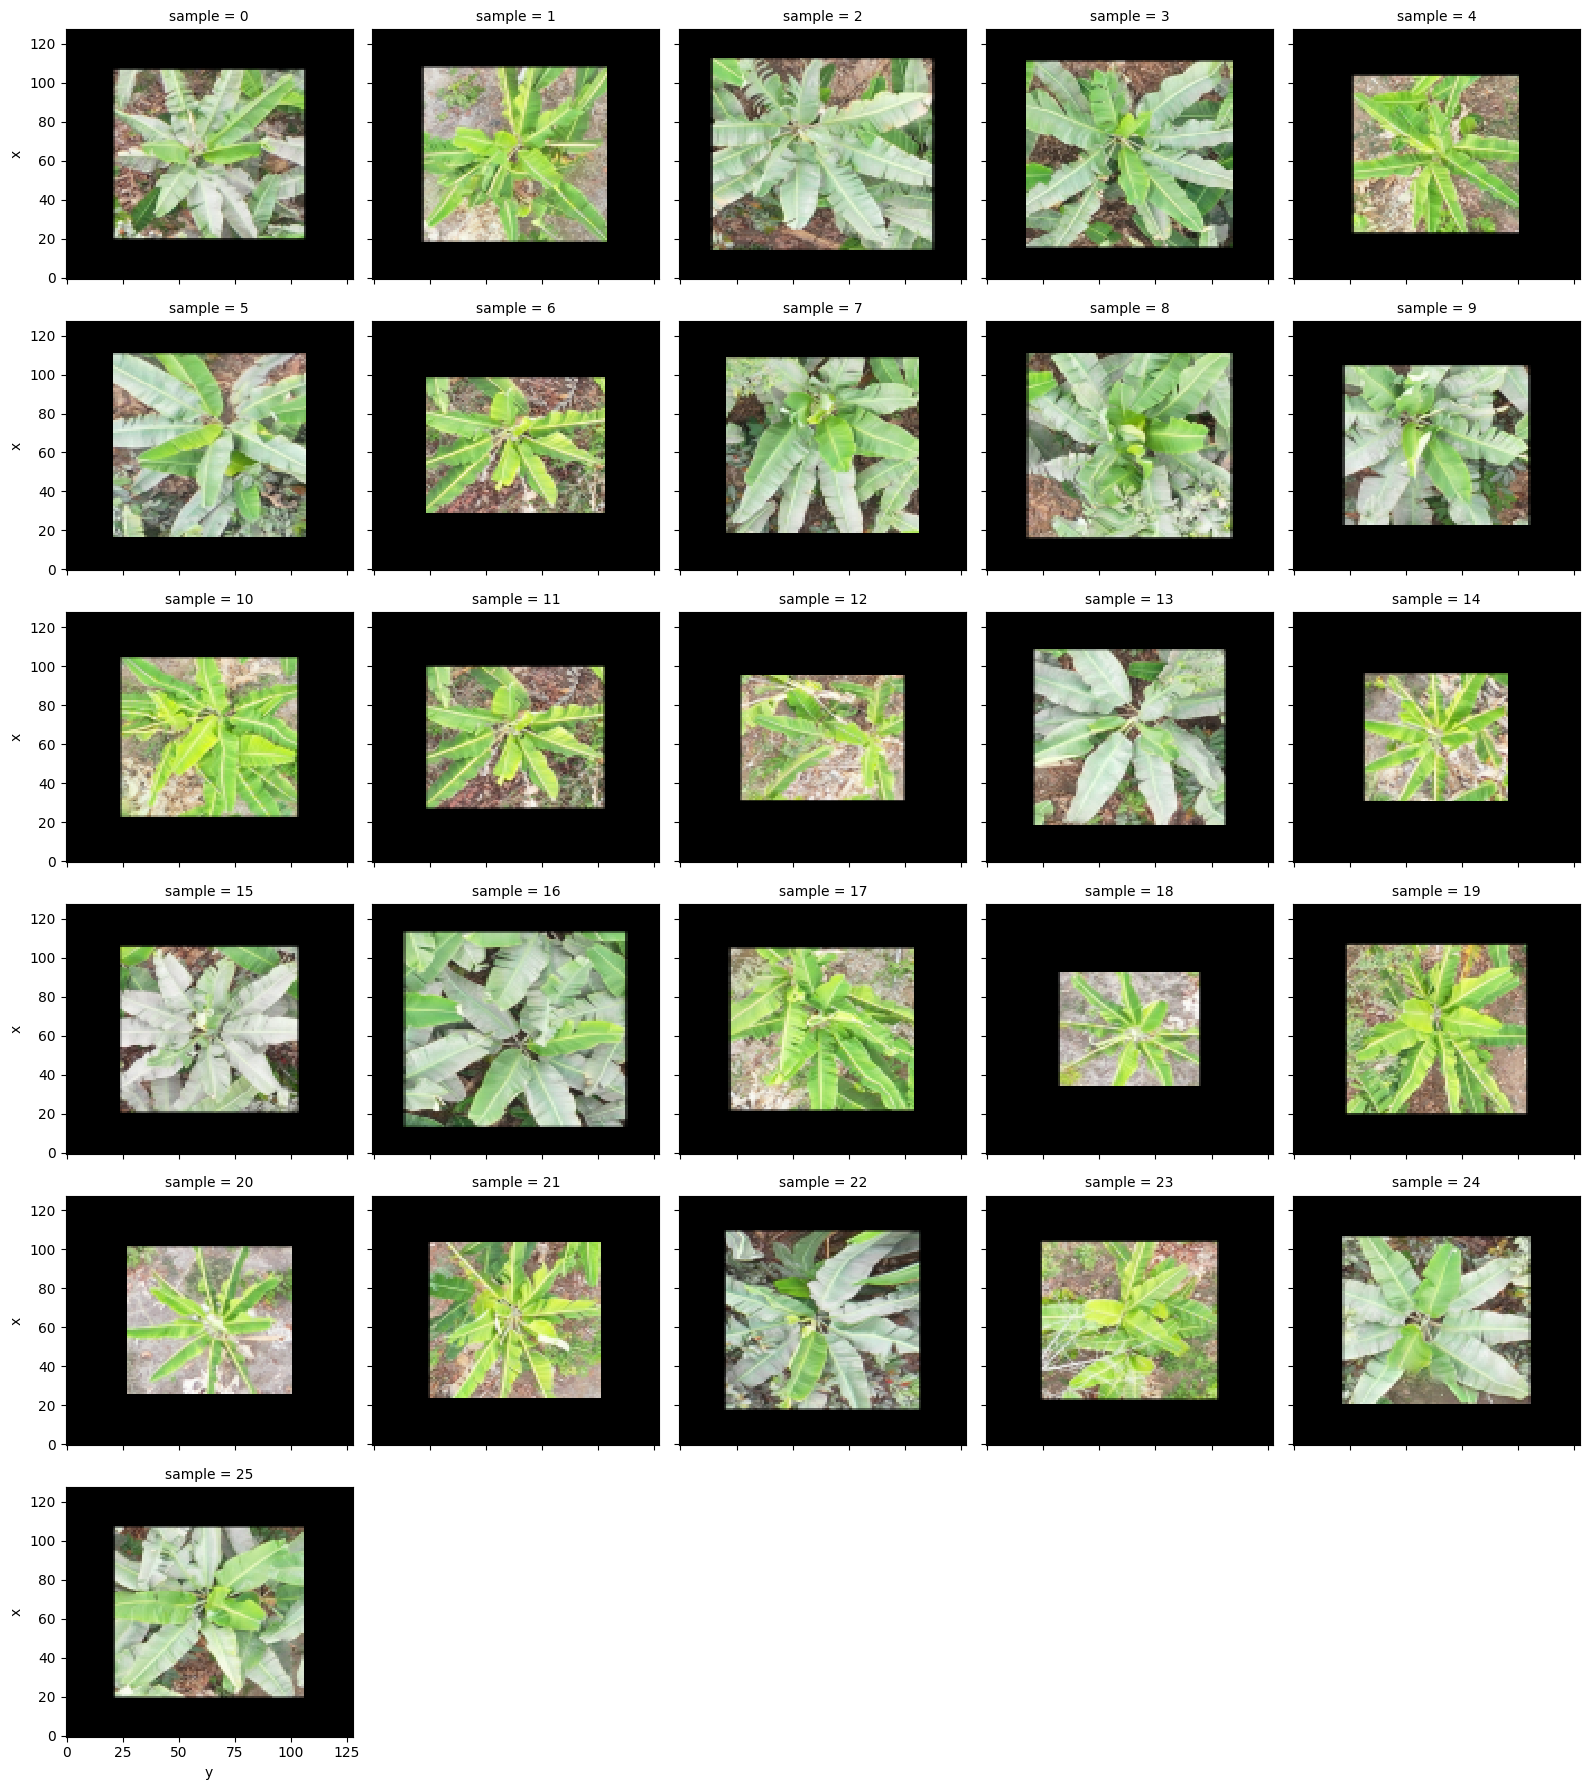

In [5]:
ds_banana = xr.open_zarr(dir_cutouts / "label174675723264_banana.zarr")
idx_banana = [1,5,10,13,14,15,22,27,33,38,43,45,46,49,51,55,57,59,62,70,77,78,81,91,96,101]
ds_banana = ds_banana.isel(
    sample=idx_banana
)
# shuffle in sample dimension
ds_banana = ds_banana.sel(sample=rng.permutation(ds_banana.sample))
ds_banana["X"].plot.imshow(col="sample", col_wrap=5)

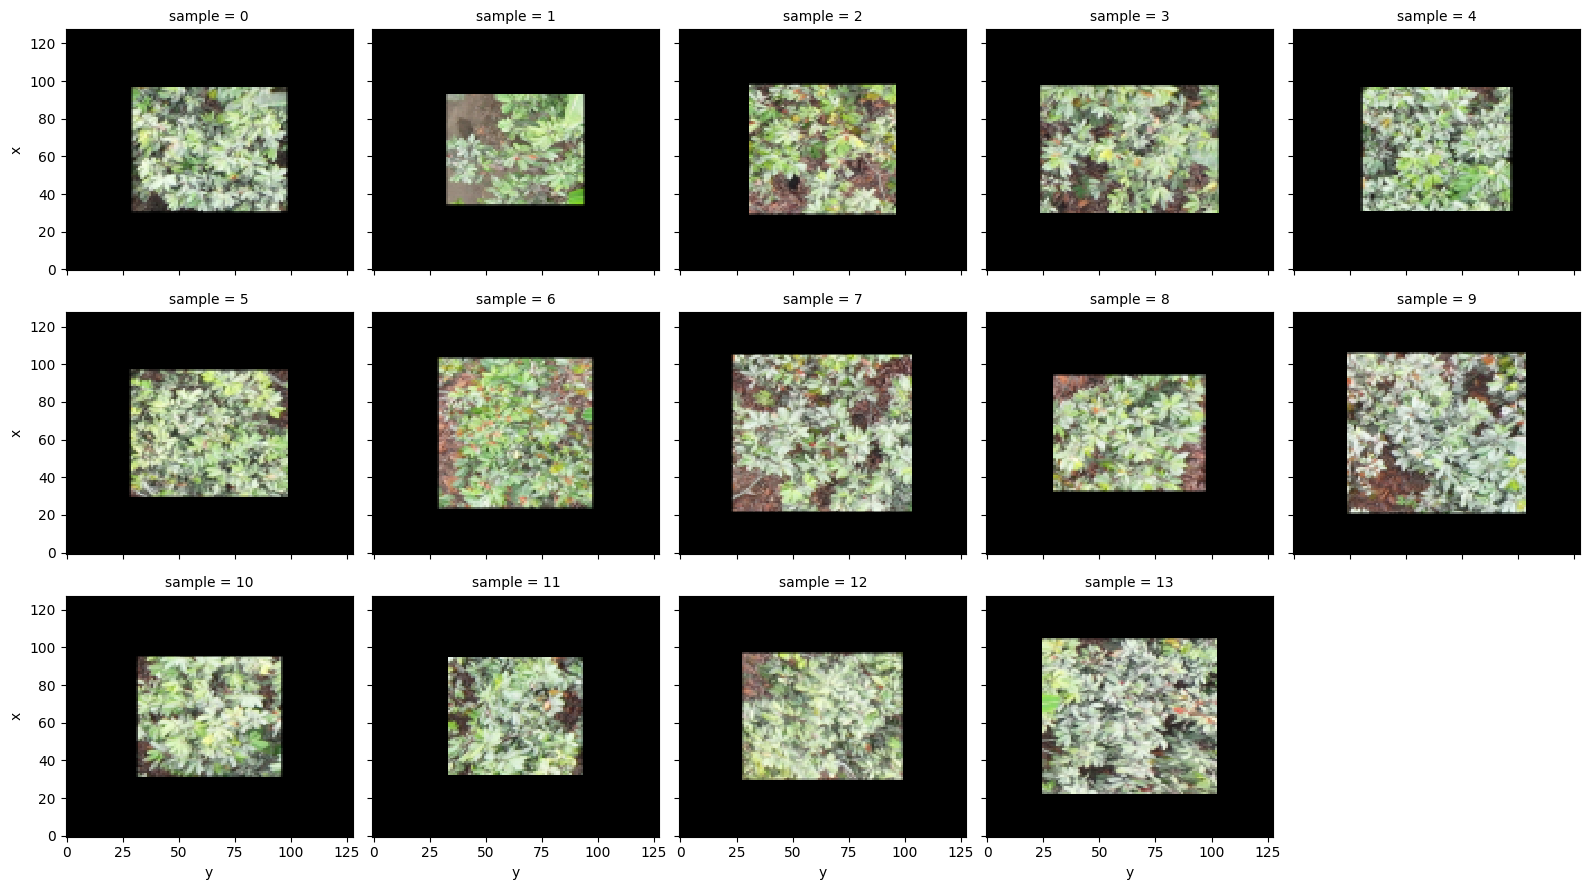

In [6]:
ds_cacao = xr.open_zarr(dir_cutouts / "label999240878592_cacao.zarr")
idx_cacao = [7,10,23,25,28,48,50,51,53,56,58,62,67,69]
ds_cacao = ds_cacao.isel(
    sample=idx_cacao
)
ds_cacao = ds_cacao.sel(sample=rng.permutation(ds_cacao.sample))
ds_cacao['X'].plot.imshow(col="sample", col_wrap=5)

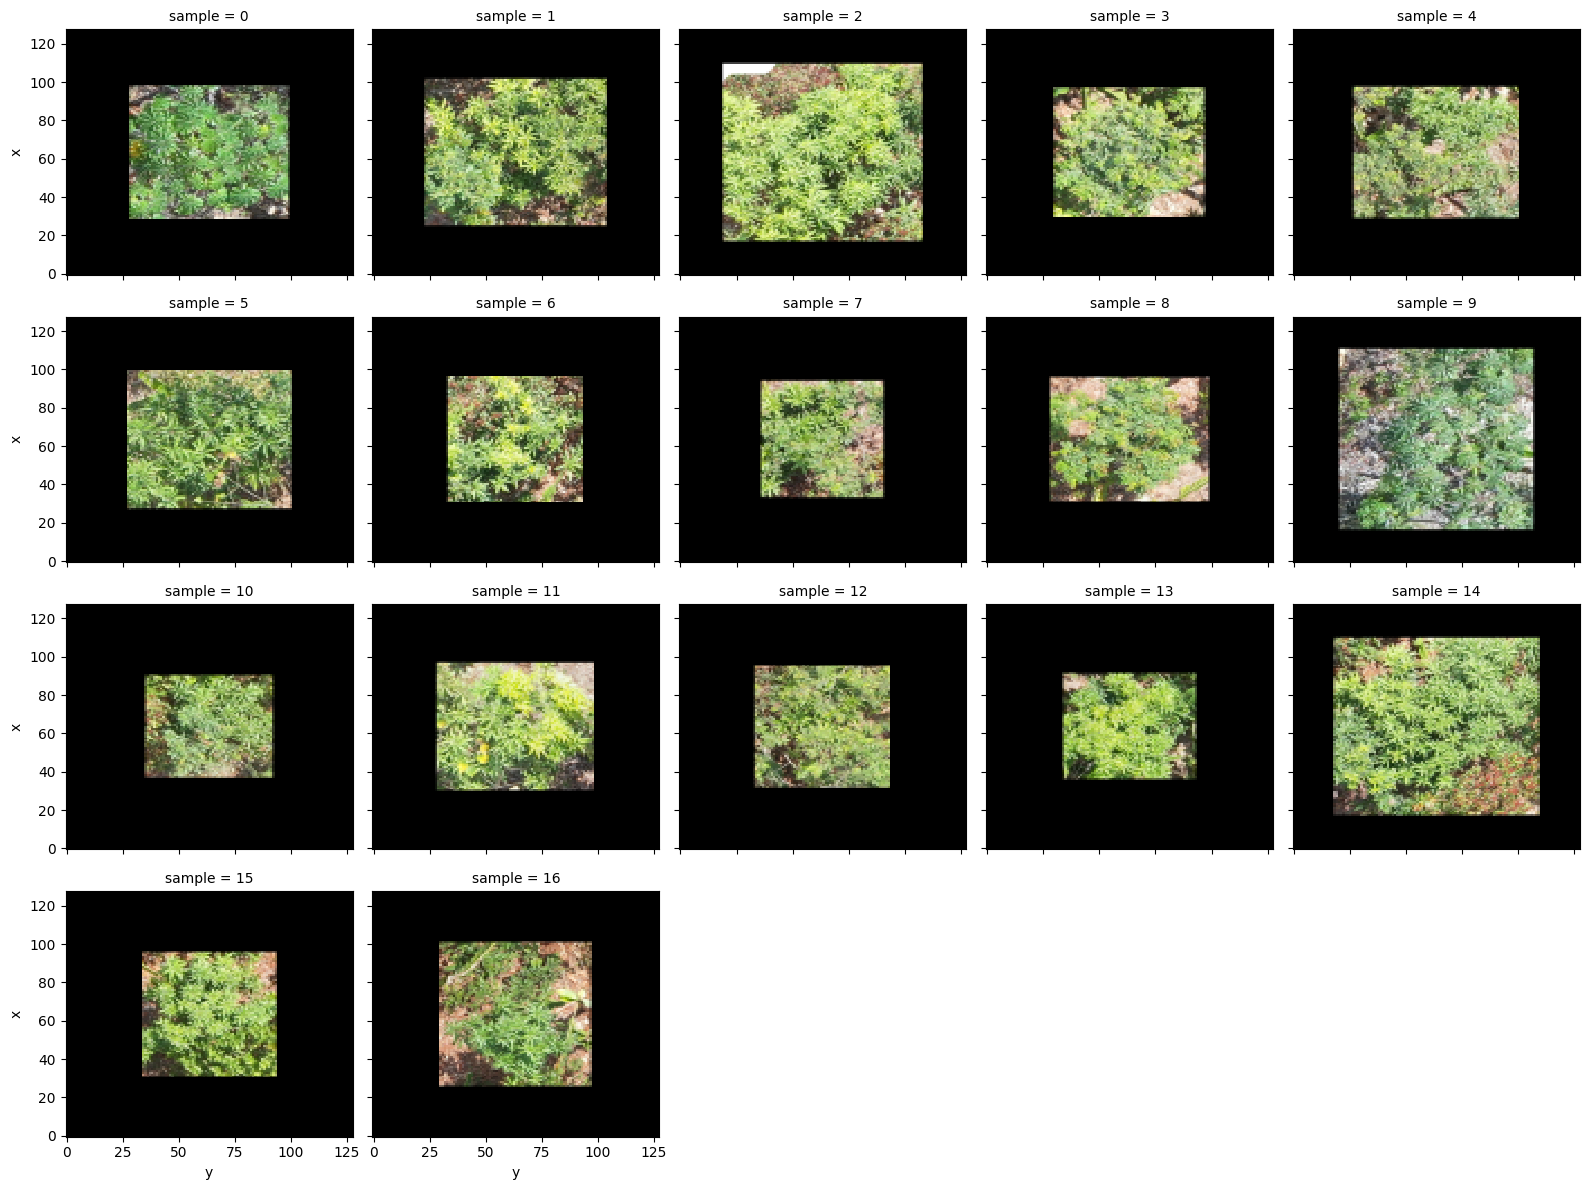

In [7]:
ds_fruit = xr.open_zarr(dir_cutouts / "label370414265344_fruit.zarr")
idx_fruit = [5,8,11,15,16,19,22,25,27,32,35,41,47,49,50,53,54]
ds_fruit = ds_fruit.isel(
    sample=idx_fruit
)
ds_fruit = ds_fruit.sel(sample=rng.permutation(ds_fruit.sample))
ds_fruit['X'].plot.imshow(col="sample", col_wrap=5)

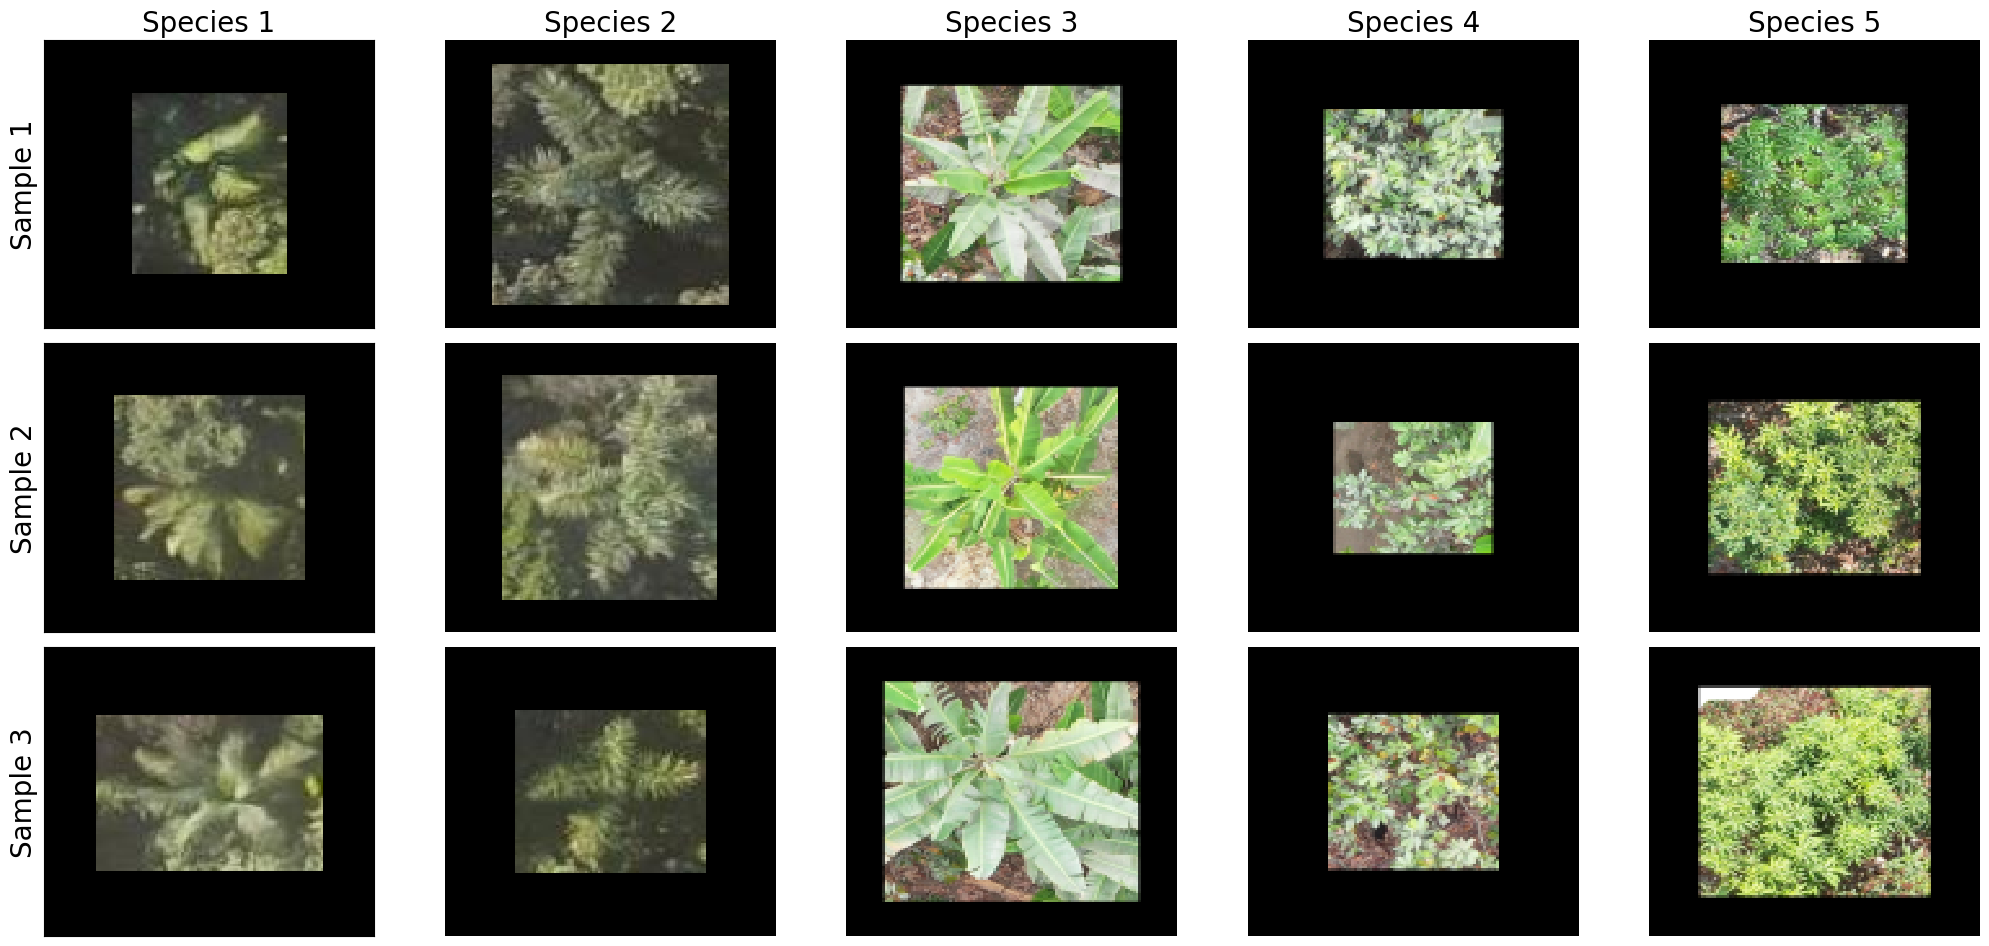

In [8]:
# Select three samples from each class, and plot
fig, axes = plt.subplots(3, 5, figsize=(20, 10))

for ax, idx in zip(axes, range(3)):
    ds_plot_murumuru = ds_murumuru.isel(sample=idx)
    ds_plot_tucuma = ds_tucuma.isel(sample=idx)
    ds_plot_banana = ds_banana.isel(sample=idx)
    ds_plot_cacao = ds_cacao.isel(sample=idx)
    ds_plot_fruit = ds_fruit.isel(sample=idx)
    for i, ds_plot in enumerate([ds_plot_murumuru, ds_plot_tucuma, ds_plot_banana, ds_plot_cacao, ds_plot_fruit]):
        ds_plot["X"].astype(np.int64).plot.imshow(ax=ax[i])
        plt.tight_layout()
        
        if idx == 0:
            ax[i].set_title(f"Species {i+1}", fontsize=20)
        if i == 0:
            ax[i].set_ylabel(f"Sample {idx+1}", fontsize=20)
            ax[i].set_yticks([])
            ax[i].set_xticks([])
            ax[i].set_xlabel("")
        else:
            ax[i].axis("off")

In [9]:
dir_selected_cutouts = Path("/data/Projects/2024_Invasive_species/Tree_Classification/notebooks/data_agu/selected_cutouts")
list_files = [
    "label142377591163_murumuru.zarr",
    "label244751236943_tucuma.zarr",
    "label174675723264_banana.zarr",
    "label999240878592_cacao.zarr",
    "label370414265344_fruit.zarr",
]

for ds, file in zip(
    [ds_murumuru, ds_tucuma, ds_banana, ds_cacao, ds_fruit], list_files
):
    print(file)
    print(f"shape:{ds['X'].sizes}")
    print(f"label:{np.unique(ds['Y'].values)}")
    ds.chunk({"sample": 50}).to_zarr(dir_selected_cutouts/file, mode="w"
    )
    print("---")

label142377591163_murumuru.zarr
shape:Frozen({'sample': 13, 'x': 128, 'y': 128, 'channel': 3})
label:[1.42377591e+11]
---
label244751236943_tucuma.zarr
shape:Frozen({'sample': 29, 'x': 128, 'y': 128, 'channel': 3})
label:[2.44751237e+11]
---
label174675723264_banana.zarr
shape:Frozen({'sample': 26, 'x': 128, 'y': 128, 'channel': 3})
label:[174675723264]
---
label999240878592_cacao.zarr
shape:Frozen({'sample': 14, 'x': 128, 'y': 128, 'channel': 3})
label:[999240878592]
---
label370414265344_fruit.zarr
shape:Frozen({'sample': 17, 'x': 128, 'y': 128, 'channel': 3})
label:[370414265344]
---


/data/Projects/2024_Invasive_species/EnvSiamense/lib/python3.10/site-packages/xarray/core/dataset.py:2549: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/data/Projects/2024_Invasive_species/EnvSiamense/lib/python3.10/site-packages/xarray/core/dataset.py:2549: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


## Generate training pairs

In [10]:
dir_selected_cutouts = Path("/data/Projects/2024_Invasive_species/Tree_Classification/notebooks/data_agu/selected_cutouts")
list_files = [
    "label142377591163_murumuru.zarr",
    "label244751236943_tucuma.zarr",
    "label174675723264_banana.zarr",
    "label999240878592_cacao.zarr",
    "label370414265344_fruit.zarr",
]

# Load selected cutouts
list_ds = []
for file in list_files:
    ds = xr.open_zarr(dir_selected_cutouts / file)
    list_ds.append(ds)

ds_all = xr.concat(list_ds, dim="sample")
ds_all

<xarray.Dataset> Size: 39MB
Dimensions:  (sample: 99, x: 128, y: 128, channel: 3)
Dimensions without coordinates: sample, x, y, channel
Data variables:
    X        (sample, x, y, channel) float64 39MB dask.array<chunksize=(13, 128, 128, 3), meta=np.ndarray>
    Y        (sample) float64 792B dask.array<chunksize=(13,), meta=np.ndarray>

In [11]:
# Function to add Gaussian noise to an RGB image
def add_gaussian_noise(image, mean=0, std=25):
    
    non_zeros = image>0
    # Generate Gaussian noise
    noise = np.random.normal(mean, std, image.shape)
    
    # Add the noise to the image
    noisy_image = image + noise
    
    # Clip the image to ensure pixel values are in the range [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.int64)*non_zeros
    
    return noisy_image

# def random_crop(img_crop, crop_size=(108, 108)):
#     assert crop_size[0] <= img_crop.shape[0] and crop_size[1] <= img_crop.shape[1], "Crop size should be less than image size"
#     w, h = img_crop.shape[:2]
#     x, y = np.random.randint(h-crop_size[0]), np.random.randint(w-crop_size[1])
#     img_crop = img_crop[y:y+crop_size[0], x:x+crop_size[1], :]
#     img_crop = resize(img_crop, (w, h))
#     img_crop = np.clip(img_crop, 0, 255)
#     # img_crop = img_crop.astype(np.uint8)
#     return img_crop

def random_crop(img, crop_size=(108, 108)):
    assert crop_size[0] <= img.shape[0] and crop_size[1] <= img.shape[1], "Crop size should be less than image size"
    w, h = img.shape[:2]
    img = np.clip(img, 0, 255)
    x, y = np.random.randint(h-crop_size[0]), np.random.randint(w-crop_size[1])
    img_crop = img[y:y+crop_size[0], x:x+crop_size[1], :]   
    img_crop = resize(img_crop, (w, h))
    if not np.any(img_crop):
        return img_crop
    else:
        return img

def aug_img_pair(img):
    """Augment a image and generate a list of augmented images

    Parameters
    ----------
    img_pair : list of xr.DataArray, size 2

    Returns
    -------
    _type_
        _description_
    """
    
    # randomly add gaussian noise
    img_gaussian = img.copy()
    img_gaussian.data = add_gaussian_noise(img_gaussian.values, mean=0, std=25)                       
            
    # randomly rotate img 90, 180, 270
    img_rot = img.copy()
    img_rot.data = np.rot90(img.values, k=rng.integers(1, 4))
    
    # random rotate another angle which is not 90, 180, 270
    angle = rng.integers(1, 359)
    while angle in {90, 180, 270}:
        angle = rng.integers(1, 359)
    img_ran_rot_1 = img.copy()
    img_ran_rot_1.data = np.clip(rotate(img_ran_rot_1.values, angle, reshape=False), 0, 255)
    
    # random rotate and add noise
    img_ran_rot_2 = img.copy()
    img_ran_rot_2.data = add_gaussian_noise(img_ran_rot_2.data, mean=0, std=25) 
    img_ran_rot_2.data = np.clip(rotate(img_ran_rot_2.values, angle/2, reshape=False), 0, 255)
    
    # random crop
    img_crop = img.copy()
    img_crop.data = random_crop(img_crop.values)

    # flip left-right img
    img_flip_lr = img.isel(x=slice(None, None, -1))

    # flip up-down img
    img_flip_ud = img.isel(y=slice(None, None, -1))

    img_list = [
        img,
        img_rot,
        img_flip_lr,
        img_flip_ud,
        img_ran_rot_1,
        img_ran_rot_2,
        img_crop
    ]
    
    return img_list

In [12]:
N_AUGMENTED = 7 # Number of augmented images plus original image

In [13]:
def generate_train_image_pairs(images_dataset, labels_dataset):
    """Function to generate image pairs for training

    Parameters
    ----------
    images_dataset : image dataset
        Xarray DataArray containing the images, can be dask array
    labels_dataset : label dataset
        NumPy array for simplicity
    """
    labels_dataset = labels_dataset.compute()
    unique_labels = np.unique(labels_dataset.values)

    # Find the minimum number of samples
    min_n_sample = min(
        [
            images_dataset.where(labels_dataset == label, drop=True).sizes["sample"]
            for label in unique_labels
        ]
    )

    # Generate a ds of augmented images
    images_dataset_aug = None
    for label in unique_labels:
        imgs_curr = images_dataset.where(labels_dataset == label, drop=True)
        imgs_curr = imgs_curr.isel(sample=range(min_n_sample))
        list_imgs_curr_aug = []
        for idx_img in range(min_n_sample):
            list_imgs_curr_aug = list_imgs_curr_aug + aug_img_pair(
                imgs_curr.isel(sample=idx_img)
            )
        da_curr_aug = xr.concat(list_imgs_curr_aug, dim="sample")
        ds_curr_aug = xr.Dataset({"X": da_curr_aug})
        ds_curr_aug = ds_curr_aug.assign(
            Y=xr.DataArray(np.full(da_curr_aug.sizes["sample"], label), dims="sample")
        )
        if images_dataset_aug is None:
            images_dataset_aug = ds_curr_aug
        else:
            images_dataset_aug = xr.concat(
                [images_dataset_aug, ds_curr_aug], dim="sample"
            )

    # Generate all possible similar pairs indices combinations
    pairs_idx_similar = list(combinations(range(min_n_sample * N_AUGMENTED), 2))
    pairs_idx_dissimilar = list(
        product(range(min_n_sample * N_AUGMENTED), range(min_n_sample * N_AUGMENTED))
    )

    label_dataset_aug = images_dataset_aug["Y"].compute()

    pair_images = []
    pair_labels = []

    for label in unique_labels:
        pair_images = []
        pair_labels = []
        # Images of current label
        imgs_curr = images_dataset_aug.where(label_dataset_aug == label, drop=True)
        imgs_curr = imgs_curr.expand_dims(pair=1)
        # Make similar pairs
        for pair in pairs_idx_similar:
            pair_images_sim = xr.concat(
                [
                    imgs_curr.isel(sample=pair[0]).expand_dims(sample=1),
                    imgs_curr.isel(sample=pair[1]).expand_dims(sample=1),
                ],
                dim="pair",
            )

            pair_images.append(pair_images_sim)
            pair_labels.append(1) # similar so label is 1

        # Find non similar class labels
        # To make dissimilar pairs
        label_other = np.setdiff1d(unique_labels, label)
        label_other = label_other[
            label_other > label
        ]  # Only select labels with higher value to avaoid duplicate dissimilar pairs
        mask_da = xr.DataArray(np.isin(label_dataset_aug, label_other), dims="sample")

        # find labels_dataset in list label_other
        imgs_curr_other = images_dataset_aug.where(mask_da, drop=True)

        # check length of pairs_idx_dissimilar
        labels_imgs_curr_other = imgs_curr_other["Y"].compute()

        # Make dissimilar pairs
        for label_other_curr in label_other:
            imgs_curr_other_curr = imgs_curr_other.where(
                labels_imgs_curr_other == label_other_curr, drop=True
            )
            for pair in pairs_idx_dissimilar:
                pair_images_dissim = xr.concat(
                    [
                        imgs_curr.isel(sample=pair[0]).expand_dims(sample=1),
                        imgs_curr_other_curr.isel(sample=pair[1]).expand_dims(sample=1),
                    ],
                    dim="pair",
                )
                pair_images.append(pair_images_dissim)
                pair_labels.append(0)  # dissimilar so label is 0
        
        # Write to zarr in batches
        ds_out = xr.concat(pair_images, dim="sample")
        ds_out = ds_out.assign(Y=(["sample"], pair_labels))
        ds_out = ds_out.chunk({"sample": 100, "pair": -1, "x": -1, "y": -1, "channel": -1})
        ds_out.to_zarr(f"./all_pairs_{label.astype(int)}.zarr")

    return None

In [15]:
# generate_train_image_pairs(ds_all["X"].isel(sample=range(0,90,3)), ds_all["Y"].isel(sample=range(0,90,3)))
generate_train_image_pairs(ds_all["X"], ds_all["Y"])

## Balance the training pairs

In [16]:
# Convert to a single zarr: training_pairs_unbalanced.zarr
# Load the generated pairs
list_ds=[]
for zarr_file in Path(".").glob("all_pairs_*.zarr"):
# for zarr_file in zarr_list[0:3]:
    ds = xr.open_zarr(zarr_file)
    list_ds.append(ds)
ds_images_pair = xr.concat(list_ds, dim="sample")

ds_images_pair_chunk = ds_images_pair.chunk({"sample": 100, "pair": -1, "x": -1, "y": -1, "channel": -1})
ds_images_pair_chunk.to_zarr("./training_pairs_unbalanced.zarr", mode="w")


In [17]:
ds_images_pair = xr.open_zarr("./training_pairs_unbalanced.zarr")
ds_images_pair

<xarray.Dataset> Size: 81GB
Dimensions:  (sample: 103285, pair: 2, x: 128, y: 128, channel: 3)
Dimensions without coordinates: sample, pair, x, y, channel
Data variables:
    X        (sample, pair, x, y, channel) float64 81GB dask.array<chunksize=(100, 2, 128, 128, 3), meta=np.ndarray>
    Y        (sample) int64 826kB dask.array<chunksize=(100,), meta=np.ndarray>

In [18]:
# select similar and dissimilar pairs
ds_images_pair_similar = ds_images_pair.where(ds_images_pair["Y"].compute() == 1, drop=True)
ds_images_pair_dissimilar = ds_images_pair.where(ds_images_pair["Y"].compute() == 0, drop=True)

similar pairs: 20475
non similar pairs: 82810


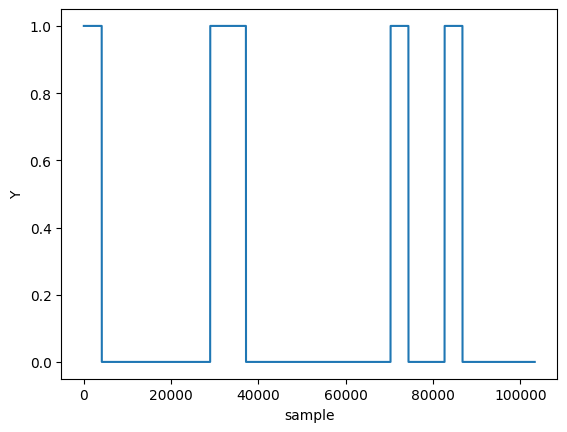

In [19]:
#check before selection
print(f"similar pairs: {np.sum(ds_images_pair['Y']==1).values}")
print(f"non similar pairs: {np.sum(ds_images_pair['Y']==0).values}")
ds_images_pair["Y"].plot()

In [20]:
# Randomly select in ds_images_pair_dissimilar to make it same size as ds_images_pair_similar
idx_select = rng.integers(
    0,
    ds_images_pair_dissimilar.sizes["sample"],
    size=ds_images_pair_similar.sizes["sample"],
)
# order idx_select
idx_select = np.sort(idx_select)
ds_images_pair_dissimilar = ds_images_pair_dissimilar.isel(sample=idx_select, drop=True)

In [21]:
# Due to memory limit, here we randomly select 10000 samples from both similar and dissimilar pairs
NN = 15000
idx_select_dis = rng.integers(
    0,
    ds_images_pair_dissimilar.sizes["sample"],
    size=NN,
)
idx_select_sim = rng.integers(
    0,
    ds_images_pair_similar.sizes["sample"],
    size=NN,
)
# order idx_select
idx_select_dis = np.sort(idx_select_dis)
idx_select_sim = np.sort(idx_select_sim)
ds_images_pair_dissimilar = ds_images_pair_dissimilar.isel(sample=idx_select_dis, drop=True)
ds_images_pair_similar = ds_images_pair_similar.isel(sample=idx_select_sim, drop=True)

In [22]:
# Combine similar and dissimilar pairs one after the other
ds_images_pair_balanced = xr.concat(
    [ds_images_pair_similar, ds_images_pair_dissimilar], dim="sample"
)
ds_images_pair_balanced

<xarray.Dataset> Size: 24GB
Dimensions:  (sample: 30000, pair: 2, x: 128, y: 128, channel: 3)
Dimensions without coordinates: sample, pair, x, y, channel
Data variables:
    X        (sample, pair, x, y, channel) float64 24GB dask.array<chunksize=(70, 2, 128, 128, 3), meta=np.ndarray>
    Y        (sample) float64 240kB dask.array<chunksize=(70,), meta=np.ndarray>

similar pairs after balancing: 15000
non similar pairs after balancing: 15000


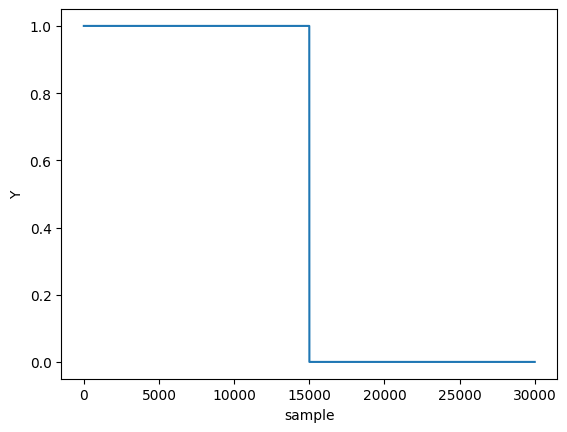

In [23]:
#check after selection
print(f"similar pairs after balancing: {np.sum(ds_images_pair_balanced['Y']==1).values}")
print(f"non similar pairs after balancing: {np.sum(ds_images_pair_balanced['Y']==0).values}")
ds_images_pair_balanced["Y"].plot()

In [24]:
# Make a index list
# first shuffle within the similar and dissimilar parts
# then mix them
# Make sure there is every similar pair is followed by a dissimilar pair

idx_similar = range(0, ds_images_pair_balanced.sizes["sample"]//2) # Get similar pair idices
idx_non_similar = range(
    ds_images_pair_balanced.sizes["sample"]//2, ds_images_pair_balanced.sizes["sample"]
) # Get dissimilar pair indices
idx_similar_shuffled = rng.permutation(idx_similar) # Shuffle similar pair indices
idx_non_similar_shuffled = rng.permutation(idx_non_similar) # Shuffle dissimilar pair indices

# Mix the shuffled idices one after the other
idx_mix = [
    val for pair in zip(idx_similar_shuffled, idx_non_similar_shuffled) for val in pair
]
idx_mix

[5969,
 26172,
 10091,
 22588,
 12174,
 20683,
 1262,
 23508,
 3197,
 28190,
 11306,
 15882,
 10719,
 18348,
 4512,
 20992,
 4223,
 24240,
 6781,
 24010,
 5267,
 22189,
 14795,
 22672,
 10400,
 25947,
 7600,
 26344,
 6332,
 16856,
 1556,
 23980,
 14210,
 19179,
 477,
 15613,
 10099,
 24132,
 5524,
 17334,
 12713,
 15950,
 14768,
 29689,
 158,
 28116,
 8710,
 19036,
 344,
 24668,
 11325,
 19418,
 5604,
 26536,
 4416,
 26229,
 2550,
 29325,
 1020,
 19040,
 2765,
 19250,
 4009,
 25758,
 4926,
 24300,
 9191,
 15273,
 7885,
 28547,
 7007,
 26472,
 8764,
 21880,
 6132,
 16910,
 3317,
 16609,
 12127,
 20386,
 4788,
 19596,
 5029,
 21158,
 1058,
 17129,
 13959,
 29915,
 437,
 23389,
 7201,
 26818,
 9679,
 26191,
 6858,
 28112,
 14590,
 22322,
 9142,
 23174,
 13176,
 21965,
 1836,
 25415,
 12111,
 28427,
 1102,
 22648,
 1753,
 21716,
 2970,
 21459,
 12994,
 16286,
 3063,
 24209,
 3659,
 28322,
 6957,
 28908,
 11189,
 18115,
 9397,
 16319,
 3617,
 18038,
 9657,
 22659,
 10461,
 23515,
 8537,
 22

In [25]:
# reorder ds_images_pair in sample dimension, make similar and dissimilar pairs one after the other
ds_images_pair_balanced_shuffled = ds_images_pair_balanced.isel(sample=idx_mix[:20000])
ds_images_pair_balanced_shuffled_test = ds_images_pair_balanced.isel(sample=idx_mix[20000:])

/data/Projects/2024_Invasive_species/EnvSiamense/lib/python3.10/site-packages/xarray/core/indexing.py:1620: PerformanceWarning: Slicing with an out-of-order index is generating 20 times more chunks
  return self.array[key]


In [27]:
# Check the number of similar and dissimilar pairs in the first and second half of dataset
# half_size = ds_images_pair_similar.sizes["sample"]
half_size = ds_images_pair_balanced_shuffled.sizes["sample"]//2
print(
    f"similar pairs first half: {np.sum(ds_images_pair_balanced_shuffled['Y'].isel(sample=range(half_size))==1).values}"
)
print(
    f"non similar pairs first half: {np.sum(ds_images_pair_balanced_shuffled['Y'].isel(sample=range(half_size))==0).values}"
)
print(
    f"similar pairs second half: {np.sum(ds_images_pair_balanced_shuffled['Y'].isel(sample=range(half_size, half_size*2))==1).values}"
)
print(
    f"non similar pairs first half: {np.sum(ds_images_pair_balanced_shuffled['Y'].isel(sample=range(half_size, half_size*2))==0).values}"
)

similar pairs first half: 5000
non similar pairs first half: 5000
similar pairs second half: 5000
non similar pairs first half: 5000


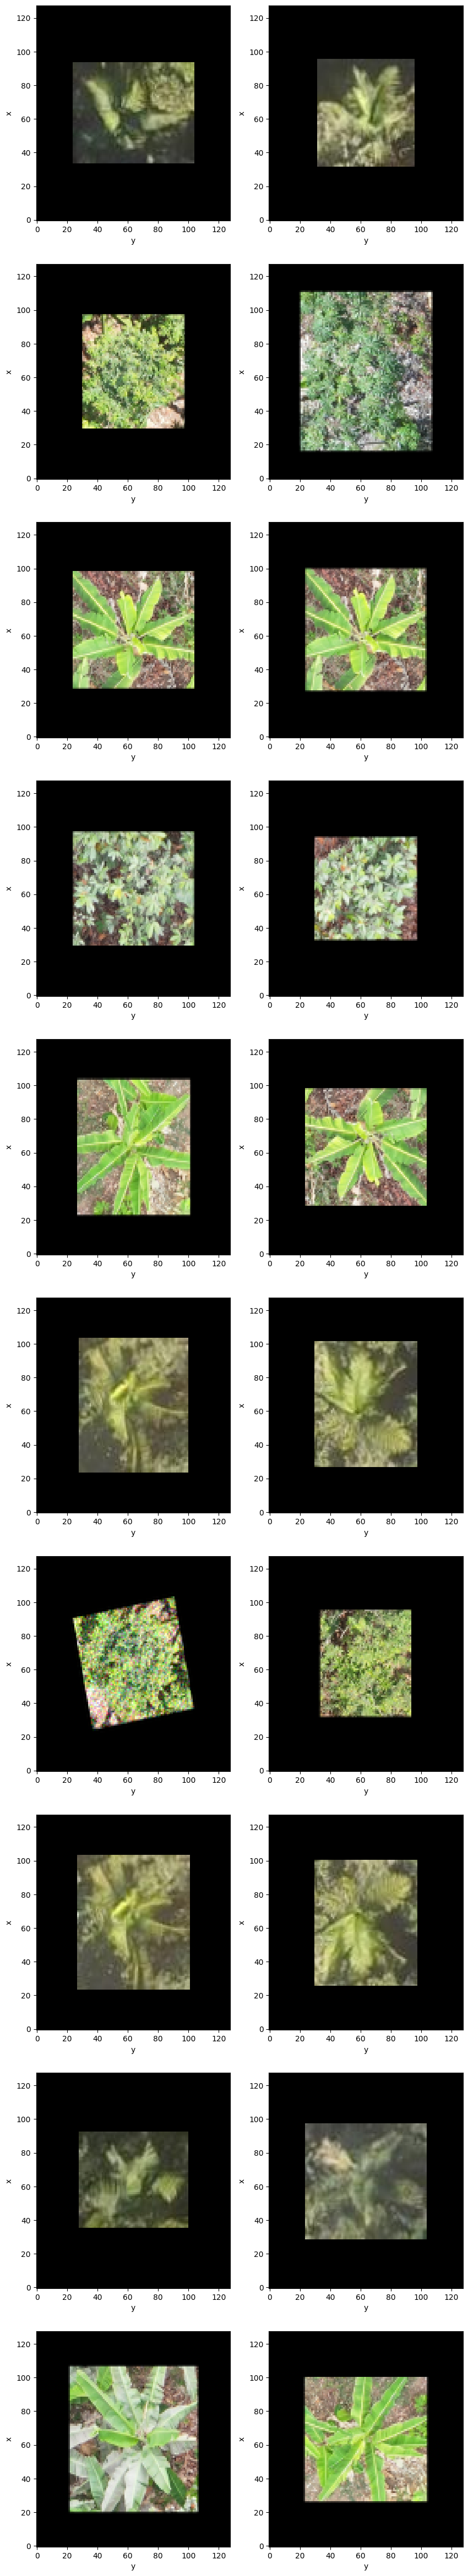

In [28]:
# radomly plot 10 similar pairs
from matplotlib import pyplot as plt

ds_plot_similar = ds_images_pair_balanced_shuffled.where(
    ds_images_pair_balanced_shuffled["Y"].compute() == 1, drop=True
)
idx_sel = rng.integers(0, ds_plot_similar.sizes["sample"], size=10)
ds_plot = ds_plot_similar.isel(sample=idx_sel)
fig, axs = plt.subplots(10, 2, figsize=(10, 60))
for i in range(10):
    ds_plot["X"].isel(sample=i, pair=0).astype("int").plot.imshow(ax=axs[i, 0])
    ds_plot["X"].isel(sample=i, pair=1).astype("int").plot.imshow(ax=axs[i, 1])

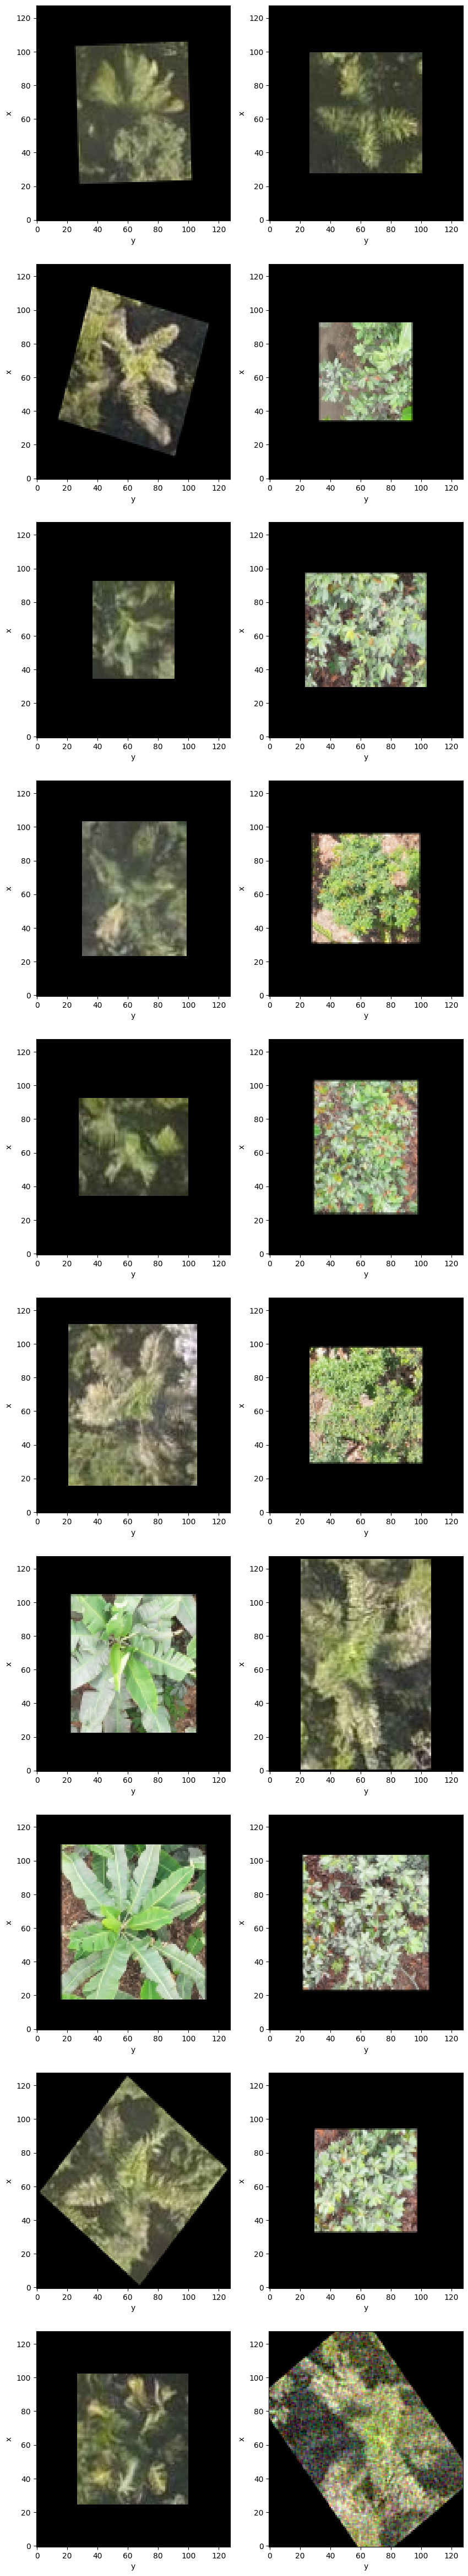

In [29]:
# radomly plot 10 non-similar pairs
from matplotlib import pyplot as plt

ds_plot_dissimilar = ds_images_pair_balanced_shuffled.where(
    ds_images_pair_balanced_shuffled["Y"].compute() == 0, drop=True
)
idx_sel = rng.integers(0, ds_plot_dissimilar.sizes["sample"], size=10)
ds_plot = ds_plot_dissimilar.isel(sample=idx_sel)
fig, axs = plt.subplots(10, 2, figsize=(10, 60))
for i in range(10):
    ds_plot["X"].isel(sample=i, pair=0).astype("int").plot.imshow(ax=axs[i, 0])
    ds_plot["X"].isel(sample=i, pair=1).astype("int").plot.imshow(ax=axs[i, 1])

## Write to Zarr

In [30]:
# Save the dataset
ds_images_pair_balanced_shuffled = ds_images_pair_balanced_shuffled.chunk(
    {"sample": 500, "pair": -1, "y": -1, "x": -1, "channel": -1}
)
ds_images_pair_balanced_shuffled.to_zarr("./training_pairs_20000.zarr", mode="w")


# Save the test dataset
ds_images_pair_balanced_shuffled_test = ds_images_pair_balanced_shuffled_test.chunk(
    {"sample": 500, "pair": -1, "y": -1, "x": -1, "channel": -1}
)
ds_images_pair_balanced_shuffled_test.to_zarr("./test_pairs_20000.zarr", mode="w")


## (When limited memory) Save the dataset in batches

In [ ]:
batch = 2000
for i in range(0, ds_images_pair_balanced_shuffled.sizes["sample"], batch):
    idx_end = min(i + batch, ds_images_pair_balanced_shuffled.sizes["sample"])
    ds_out = ds_images_pair_balanced_shuffled.isel(sample=range(i, idx_end)).compute()
    ds_out = ds_out.chunk({"sample": 500, "pair": -1, "y": -1, "x": -1, "channel": -1})
    xr.unify_chunks(ds_out)
    ds_out = ds_out.chunk({"sample": 500, "pair": -1, "y": -1, "x": -1, "channel": -1})
    ds_out.to_zarr(f"training_pairs_parts/training_pairs_{i}.zarr", mode="w")

In [ ]:
# Merge into one zarr
list_ds = []
for zarr_file in Path("./training_pairs_parts").glob("training_pairs_*.zarr"):
    ds = xr.open_zarr(zarr_file)
    list_ds.append(ds)
ds_images_pair_balanced_shuffled = xr.concat(list_ds, dim="sample")
ds_images_pair_balanced_shuffled

In [ ]:
# Check again before saving
half_size = ds_images_pair_balanced_shuffled.sizes["sample"]//2
print(
    f"similar pairs first half: {np.sum(ds_images_pair_balanced_shuffled['Y'].isel(sample=range(half_size))==1).values}"
)
print(
    f"non similar pairs first half: {np.sum(ds_images_pair_balanced_shuffled['Y'].isel(sample=range(half_size))==0).values}"
)
print(
    f"similar pairs second half: {np.sum(ds_images_pair_balanced_shuffled['Y'].isel(sample=range(half_size, half_size*2))==1).values}"
)
print(
    f"non similar pairs first half: {np.sum(ds_images_pair_balanced_shuffled['Y'].isel(sample=range(half_size, half_size*2))==0).values}"
)

In [ ]:
ds_images_pair_balanced_shuffled = ds_images_pair_balanced_shuffled.chunk({"sample": 500, "pair": -1, "y": -1, "x": -1, "channel": -1})
ds_images_pair_balanced_shuffled.to_zarr("./training_pairs.zarr", mode="w")